In [25]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Define the input directory
dataset_path = "../mri_dataset/kaggle_3m/"
output_path = "../mri_dataset/downsampled/"
patient_images = {}

# Define the target resolution (width, height)
target_resolution = (64, 64)

# Create the output directory if it doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Define a custom sorting function to sort filenames by numeric part
def sort_by_numeric(filename):
    return int(''.join(filter(str.isdigit, filename)))

# Function to downsample an image
def downsample_image(img, target_resolution):
    return img.resize(target_resolution, Image.LANCZOS)

# Iterate over patients in the dataset
for patient in os.listdir(dataset_path):
    patient_images[patient] = []
    
    # Iterate over TIFF files for each patient
    for tif_file in sorted(os.listdir(os.path.join(dataset_path, patient)), key=sort_by_numeric):
        if "_mask" not in tif_file:  # Filter out "mask" images
            # Read original image
            original_image_path = os.path.join(dataset_path, patient, tif_file)
            original_img = Image.open(original_image_path)
            
            # Downsample the image
            downscaled_img = downsample_image(original_img, target_resolution)
            
            # Save the downsampled image to the output directory
            output_downscaled_image_path = os.path.join(output_path, patient, tif_file)
            os.makedirs(os.path.dirname(output_downscaled_image_path), exist_ok=True)
            downscaled_img.save(output_downscaled_image_path)
            
            # Convert image to numpy array and append to patient images list
            original_img_array = np.array(original_img)
            downscaled_img_array = np.array(downscaled_img)
            patient_images[patient].append([original_img_array, downscaled_img_array])


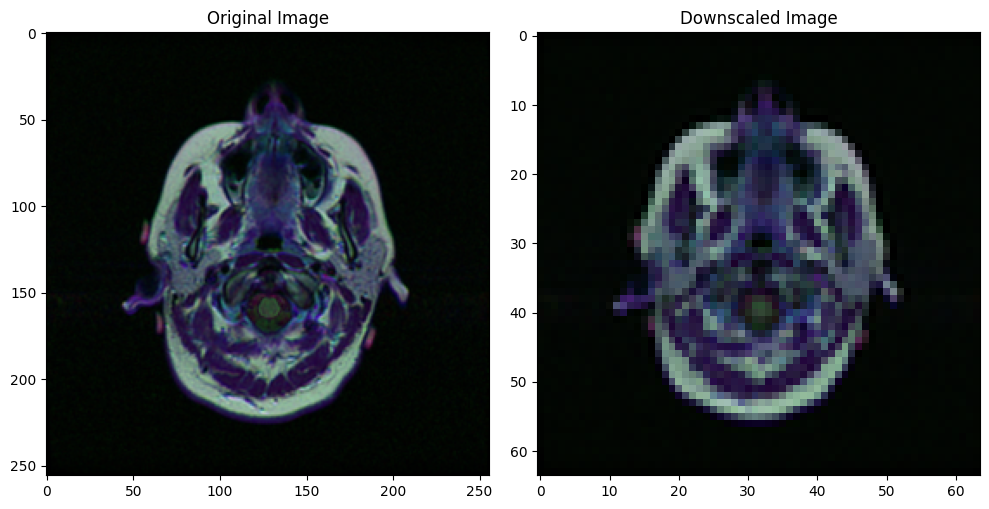

In [26]:
import random

# Randomly select one patient
random_patient = random.choice(list(patient_images.keys()))

# Randomly select one image from the selected patient's images
random_image_pair = random.choice(patient_images[random_patient])

# Create a new figure
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image
axes[0].imshow(random_image_pair[0])
axes[0].set_title('Original Image')

# Plot the downscaled image
axes[1].imshow(random_image_pair[1])
axes[1].set_title('Downscaled Image')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
